- **Nama : Merri Putri Panggabean**
- **Cohort Id : MC404D5X0047**
- **Email : merypanggabean219@gmail.com**


# Domain Proyek
## Latar Belakang

Pendidikan merupakan salah satu faktor kunci utama dalam pembangunan suatu negara karena berperan penting dalam meningkatkan kualitas sumber daya manusia. oleh karena itu, pemahaman terhadap faktor-faktor yang memengaruhi kinerja akademik siswa sangat penting untuk meningkatkan mutu pendidikan. seiring berkembangnya teknologi dan ketersediaan data, analisis data pendidikan menjadi pendekatan yang semakin populer untuk memahami pola-pola yang memengaruhi performa belajar siswa.

Salah satu dataset yang dapat penulis analisis ialah **Student Perfomance Dataset** yang mencakup berbagai variabel seperti status sosial, ekonomi, tingkat pendidikan orang tua dan jenis makanan yang dikelola. Melalui analisis dataset ini, penulis dapat mengindefikasi faktor-faktor utama yang berkorelasi dengan performa siswa di sekolah. Pemahaman ini dapat membantu guru, orang tua dan pembuat kebijakan dalam merancang starategi pembelajaran yang lebih efektif dan inklusif.

Masalah yang diangkat dalam proyek ini ialah **Bagaimana berbagai faktor sosial,pendidikan dan pola makan siswa memengaruhi hasil belajar siswa.** Masalah ini penting untuk diselesaikan karena ketimpangan dalam hasil pendidikan dapat berdampak pada kesempatan masa depan siswa, terutama bagi siswa yang kurang mendapat fasilitas seperti siswa pada umumnya.

Beberapa penelitian juga telah menunjukkan bahwa analisis data pendidikan dapat mengungkapkan pola yang tidak dampak secara kasat mata. Menurut Cortex dan Silva (2008), yang menggunakan metode data mining pada data siswa di portugal, ditemukan bahwa faktor seperti komsumsi alkohol, waktu belajar dan hubungan keluarga memiliki pengaruh signifikan terhadap performa akademik siswa[1].

Dengan hal itu, penulis bertujuan untuk melakukan analisis lebih lanjut terhadap dataset Perfomance Student untuk mendapatkan insight yang berguna dalam meningkatkan kualitas pendidikan.

## Referensi

[1] P. Cortez and A. Silva, “Using Data Mining to Predict Secondary School Student Performance,” EUROSIS, 2008.

# Business Understanding

Dalam dunia pendidikan, memahami faktor-faktor yang memengaruhi performa siswa sangat krusial untuk meningkatkan kualitas pembelajaran dan mencegah ketimpangan hasil akademik. Melalui pendekatan analisis data dan machine learning, penulis dapat mengklarifikasi permasalahan, merumuskan tujuan, serta menyusun solusi prediktif untuk membantu pengambilan keputusan di bidang pendidikan.

## Problem Statements
Berdasarkan latar belakang diatas, berikut batasan masalah yang akan diselesaikan dalam proyek ini :

- Apa saja faktor yang berpengaruh terhadap nilai ujian siswa?
- Bagaimana perbandingan persentase siswa yang lulus dan gagal berdasarkan akademik
- Bagaimana cara untuk memprediksi performa siswa pada nilai skor ujian membaca menggunakan KNN,SVM,RF dan BOOSTING?

## Goals
Menjawab batasan masalah yang telah dirangkum dan akan menjawab pertanyaan-pertanyaan diatas, berikut tujuan masalahnya :

- Penulis perlu untuk menganalisis faktor yang berpengaruh pada nilai skor siswa.
- Penulis perlu untuk melakukan visualisasi untuk melihat persentase siswa yang lulus dan gagal berdasarkan akademik.
- Penulis perlu untuk membangun model prediksi performa siswa menggunakan ke empat algoritma yaitu KNN,RF,SVM dan BOOSTING.

## Solution Statment
untuk mencapai tujuan diatas, maka penulis perlu melakukan pendekatan pemodelan yang dimana penulis akan menggunakan langkah-langkah seperti ini :

-  Analisis Deskriptif : penulis akan menggunakan statistik deskriptif untuk memahami distribusi data. ini mencakup semua nilai skor akademik.
- Analisis korelasi : menggunakan korelasi untuk melihat hubungan antara berbagai faktor yang mempengaruhi skor nilai siswa.
- Model Prediksi : membangun model predeksi berbasis mechine learning seperti Random Forest (RF), K-Nearest Neighbors (KNN), Boosting, Support Vector Machine (SVM) untuk menangani nilai skor ujian siswa.

**Menggunakan MSE (Mean Squared Error) pada model yang akan di evaluasi.**

## **Import Library**
Pada tahap ini, penulis mengimpor berbagai library yang akan dipakai dalam melakukan Load dataset, Visualisasi data, melatih model dan mengevaluasi model yang telah dilatih sebelumnya.

In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import  OneHotEncoder
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


# Pipeline
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

Sebelum melakukan load dataset yang akan penulis uji, maka penulis perlu untuk melakukan install kaggle dan upload file *kaggle.json* yang berfungsi sebagai API Token dalam menghubungkan dataset yang akan penulis unduh.

seperti berikut langkah-langkahnya :    

In [ ]:
# Menginstall Package Kaggle
!pip install -q kaggle

In [ ]:
# mengupload Kaggle.Json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"merypanggabean","key":"f9aa5111b853e69dacd438a8121b0582"}'}

In [ ]:
# membuat direktori dan mengubah izin
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
# mengunduh dataset
!kaggle datasets download -d spscientist/students-performance-in-exams

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown


In [ ]:
# Dataset yang telah di unduh maka akan penulis ekstrak dari ZIP.
from zipfile import ZipFile
file_name ="students-performance-in-exams.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Selesai Di ekstrak")

Selesai Di ekstrak


# Dataset Understanding

### Loading Dataset

In [32]:
# Membaca dataset
# menampilkan 10 baris pertama dari dataset insu_df.
insu_df = pd.read_csv('StudentsPerformance.csv')

Menampilkan data dengan menggunakan fungsi library pandas dan dataframe yaitu `insu_df` untuk membaca dataset tersebut.

#### Exploratory Data Analysis (EDA)

In [33]:
# menampilkan data 10 baris pertama dalam dataset.
insu_df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


**Menampilkan sampel data.**

Pada tahap EDA ini, penulis perlu untuk menampilkan sampel data dengan 10 baris pertama. maka perintah untuk menampilkannya yaitu menggunakan fungsi `.head(10)` pada dataset insu_df. setelah mendapatkan hasilnya maka penulis mengetahui struktur data dalam dataset insu_df.

In [34]:
# Melihat Informasi dari Dataset
print(f'Jumlah Baris: {insu_df.shape[0]} | Jumlah Kolom: {insu_df.shape[1]}')
insu_df.info()

Jumlah Baris: 1000 | Jumlah Kolom: 8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Menampilkan Struktur Data**

setelah melihat data pada dataset insu_df. maka pada tahap ini, menampilkan struktur dataset dengan menggunakan fungsi ` .shape() dan .info()  ` yang berfungsi untuk penulis mengetahui jumlah baris dan kolom, tipe data dan apakah ada data yang `missing value` sehingga dapat dilakukan pada preparation data selanjutnya.

In [35]:
# Melihat statistik dari dataset
insu_df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


**Menampilkan deskripsi statistik data**

Pada tahap ini, penulis menggunakan fungsi ` .describe()  ` untuk menampilkan dan mengetahui statistik dasar dari kolom **` math score, reading score, writing score `** seperti `percentile, mean, standar deviasi, jumlah data, min dan max. `

In [36]:
# Melihat Missing Value
print("Jumlah Missing Value per Kolom:")
print(insu_df.isnull().sum())

Jumlah Missing Value per Kolom:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


**Melihat Missing Value pada data `insu_df`**

Pada tahap ini, penulis menggunakan fungsi ` .isnull()` yang berfungsi untuk menampilkan data yang memiliki nilai kosong atau `missing value`. setelah penulis melakukannya maka pada data `insu_df` tidak memiliki `missing value` maka **tahap preparation** tidak dilakukan lagi.

In [37]:
# menampilkan apakah data memiliki `duplikat data`
num_duplicates = insu_df.duplicated().sum()
print(f"Jumlah duplikat: {num_duplicates}")

Jumlah duplikat: 0


**Melihat Duplikat data**

Pada tahap ini, penulis menggunakan fungsi `.duplicated() ` yang berfungsi untuk menampilkan dan mengetahui apakah data memiliki duplikat data, setelah melakukannya, pada data `insu_df` tidak memiliki duplikat data. maka tidak perlu untuk melakukan tahap **preparation**.

 **Kesimpulan :**

- fungsi **`.head(10)`** : berfungsi untuk melihat sampel data dari 10 baris pertama, penulis mengetahui pada data tidak ada `missing value`.

- fungsi **`.info()`** : disini penulis menampilkan dan mengetahui jumlah baris dan kolom serta tipe data pada `insu_df`,
dimana memiliki **`1000 baris`** dan **`8 Kolom`**
tipe data ialah : memiliki 3 kolom `numerik` dan 5 kolom `kategorial`.
- fungsi **`.describe`** berfungsi untuk menampilkan dan mengetahui data statistik pada kolom numerik seperti `jumlah data, max, min, precentile, dst`
- menggunakan fungsi **`.isnull() dan .duplicated()`** yang berfungsi untuk melihat apakah ada data `missing value dan duplikat data` dari tampilan diatas tidak ada **Missing Value dan Duplikat data** pada dataset `insu_df`, jadi tidak perlu penulis untuk melakukan `Preparation`.

**Exploratory Data / Visualisasi Data**

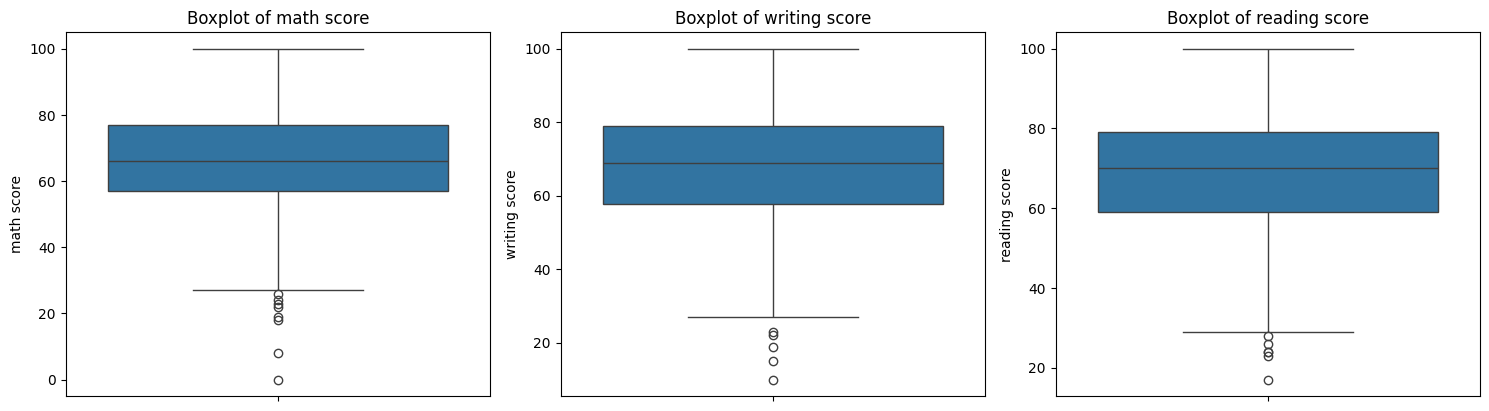

In [38]:
# Cek semua kolom numerik dengan boxplot
# untuk Menampilkan Outlier pada Data Numerik.
numerical_cols = ['math score', 'writing score', 'reading score']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=insu_df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

**Melihat Outlier pada Kolom numerik**

Pada tahap ini, penulis melakukan untuk menampilkan dan mengetahui seberapa banyak pada data yang memiliki `outlier`. dalam visualisasi diatas penulis mengetahui bahwa indikasi pada `outlier` terlihat berbeda secara signifikan. pada kolom `reading score` terlihat stabil sedangkan pada kolom `math score` dan `writing score` terlihat bahwa adanya outlier yang sangat tinggi. maka selajutnya penulis perlu untuk melakukan pada tahap **preparation**.

 **Exploratory Data Analysis - Univariate Analysis**

menggabungkan semua kolom numerik dan kolom kategori dalam satu dataframe.

In [39]:
# Membagi menjadi 2 data kolom yaitu Numerik dan Kategori.
num_features = ['math score', 'writing score', 'reading score']
cat_features = ['parental level of education','race/ethnicity','test preparation course','lunch','gender']

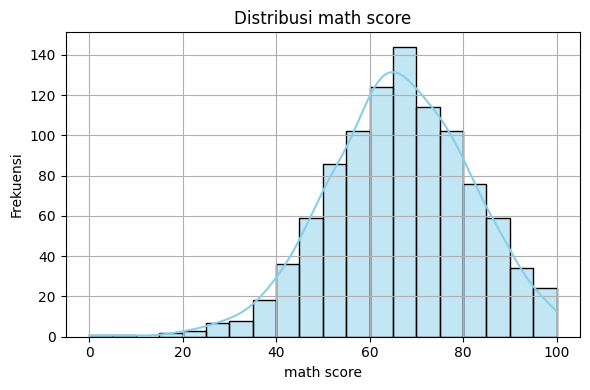

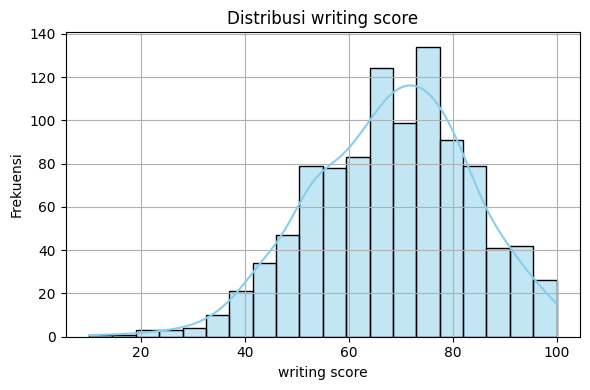

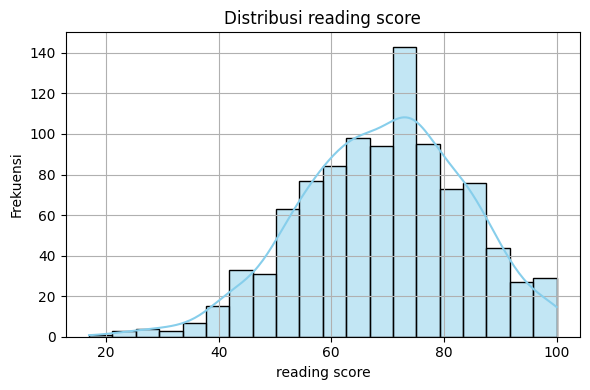

In [40]:
#  Distribusi kolom numerik
# Loop untuk membuat plot distribusi tiap kolom numerik
for col in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(insu_df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Visualisasi Distriusi kolom numerik**

dalam tahap ini, penulis perlu untuk menampilkan hasil distribusi pada setiap kolom numerik, terlihat pada tampilan diatas bahwa adanya perbedaan antara pada setiap kolom numerik yaitu :
- kolom `math score` menampilkan bahwa  jumlah nilai skor matematika siswa tersebar cukup merata dengan kecenderungan siswa memiliki nilai antara 60-70, distribusi tidak sepenuhnya simetris, dikarenakan ada leih sedikit siswa mendapat nilai tertinggi dan sangat rendah.
- kolom `writing score` menampilkan bahwa sebagian besar peserta mendapatkan skor menulis di sekitar nilai 60-80, distribusi nilai skor cenderung simetris sekitar nilai 70 dan mengindikasi bahwa skor-skor secara cukup merata disekitar rata-rata.
- kolom `reading score` menampilkan bahwa  sebagian siswa mendapatkan nilai skor antara 60-80 serta nilai yang sangat rendah antar 40 dan tertinggi antara 90 tetapi jarang diperoleh.

**Kesimpulan**

Kesimpulan yang penulis ketahui bahwa distribusi data numerik yan paling tinggi ialah `reading score` dibanding dari data numerik lainnya.

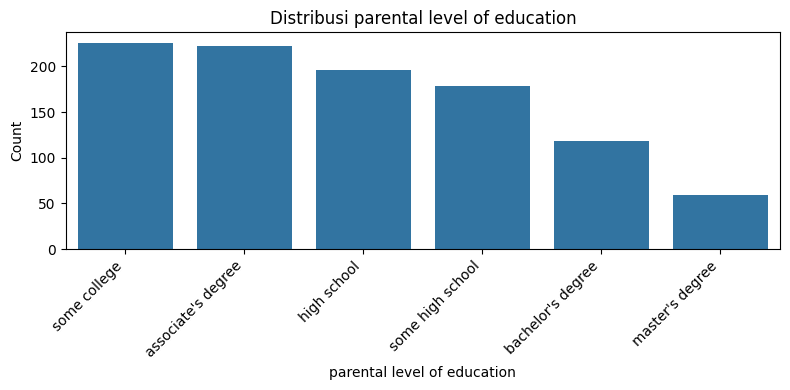

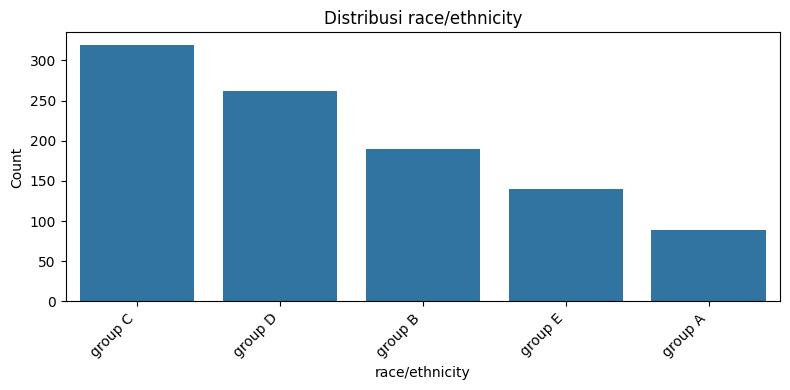

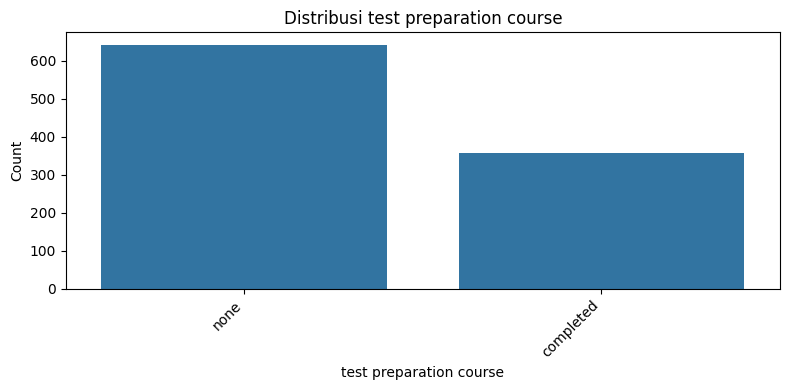

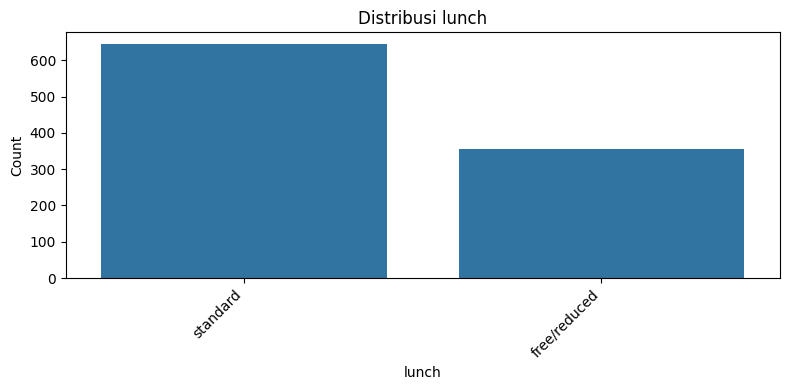

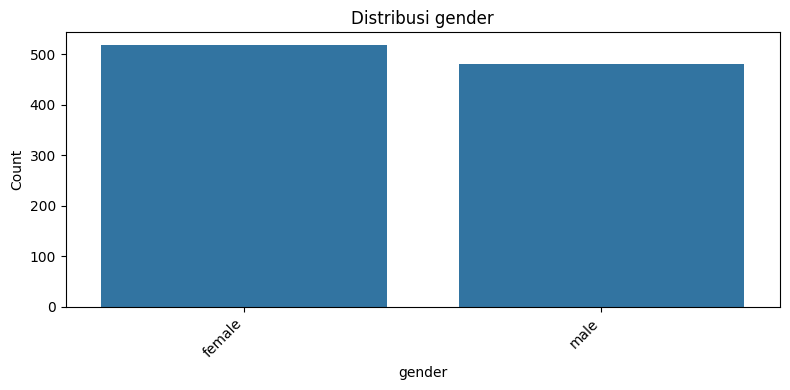

In [41]:
# Menampilkan korelasi pada kolom kategori.
# Pastikan semua label kategori terlihat
for col in cat_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=insu_df, x=col, order=insu_df[col].value_counts().index)
    plt.title(f'Distribusi {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Visualisasi Distribusi Data Kategori**

Pada tahap ini, penulis melakukan untuk menampilkan dan mengetahui distribusi pada setiap data kategori yang saling berhubungan satu sama lain, berikut kesimpulan yang didapat :    
- pada kolom `Parental level of education` yang dapat penulis ketahui bahwa tingkat pendidikan some college lebih tinggi dari data lainnya sedangkan yang terendah ialah tingkat pendidikan master degree.
- kolom `race/ethnicity yang penulis ketahui bahwa kelompok etnis yang lebih tinggi ialah group c sedangkan group B cenderung signifikan, dan kelompok etnis yang paling rendah ialah group A.
- kolom `test preparation course` diketahui bahwa jenis ujian yang paling tinggi ialah none dibandingkan jenis ujian completed memiliki nilai yang paling rendah.
- pada kolom `lunch` yang dapat diketahui bahwa jenis makan siang yang lebih tinggi ialah standar dibanding free/recuded yang lebih rendah.
- kolom `gender` yang penulis ketahui bahwa jenis kelamin female lebih tinggi dari jenis kelamin male.

**Kesimpulan**

adanya perbedaan yang siginifikan yang penulis lihat dari distribusi data kategori dari semual kolom kategori.


==== Ringkasan untuk fitur: parental level of education ====
                             jumlah sampel  persentase (%)
parental level of education                               
some college                           226            22.6
associate's degree                     222            22.2
high school                            196            19.6
some high school                       179            17.9
bachelor's degree                      118            11.8
master's degree                         59             5.9


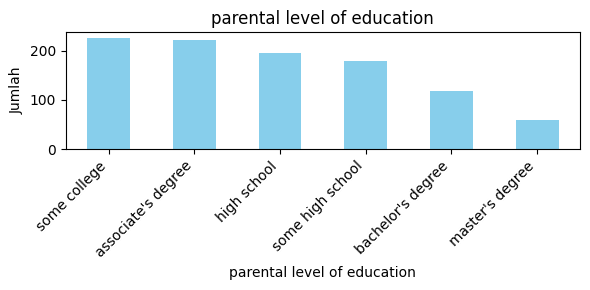


==== Ringkasan untuk fitur: race/ethnicity ====
                jumlah sampel  persentase (%)
race/ethnicity                               
group C                   319            31.9
group D                   262            26.2
group B                   190            19.0
group E                   140            14.0
group A                    89             8.9


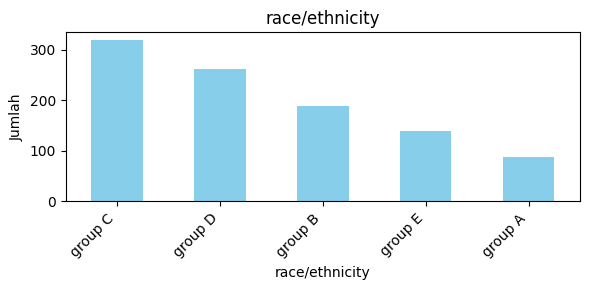


==== Ringkasan untuk fitur: test preparation course ====
                         jumlah sampel  persentase (%)
test preparation course                               
none                               642            64.2
completed                          358            35.8


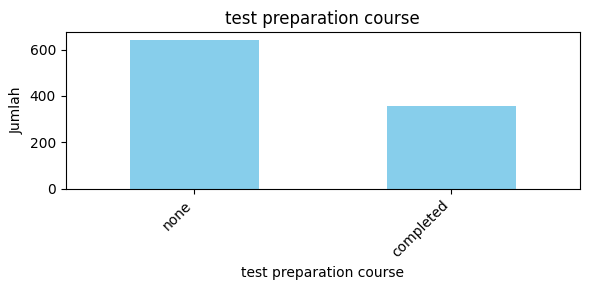


==== Ringkasan untuk fitur: lunch ====
              jumlah sampel  persentase (%)
lunch                                      
standard                645            64.5
free/reduced            355            35.5


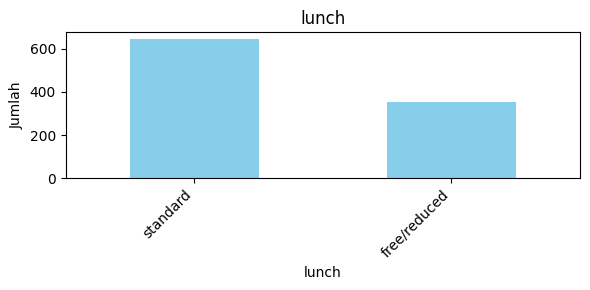


==== Ringkasan untuk fitur: gender ====
        jumlah sampel  persentase (%)
gender                               
female            518            51.8
male              482            48.2


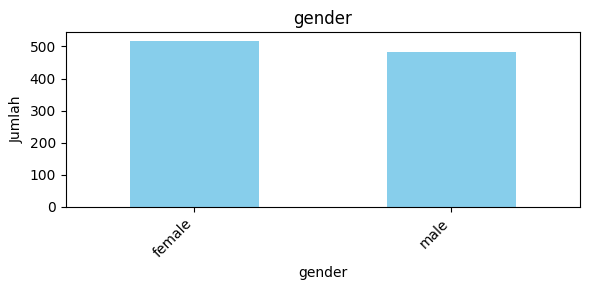

In [42]:
# Membuat dan menampilkan ringkasan jumlah sampel pada setiap kolom kategori

for feature in cat_features:
    print(f"\n==== Ringkasan untuk fitur: {feature} ====")

    count = insu_df[feature].value_counts()
    percent = 100 * insu_df[feature].value_counts(normalize=True)

    df1 = pd.DataFrame({
        'jumlah sampel': count,
        'persentase (%)': percent.round(1)
    })

    print(df1)

    # Visualisasi bar chart
    count.plot(kind='bar', title=feature, figsize=(6, 3), color='skyblue')
    plt.ylabel('Jumlah')
    plt.xlabel(feature)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Visualisasi jumlah sample data kategori**

Pada tahap ini, penulis melakukan untuk menampilkan visualisasi jumlah sample dan persentase pada setiap data kategori, agar penulis dapat mengetahui kontrubusi pada setiap data kategori.

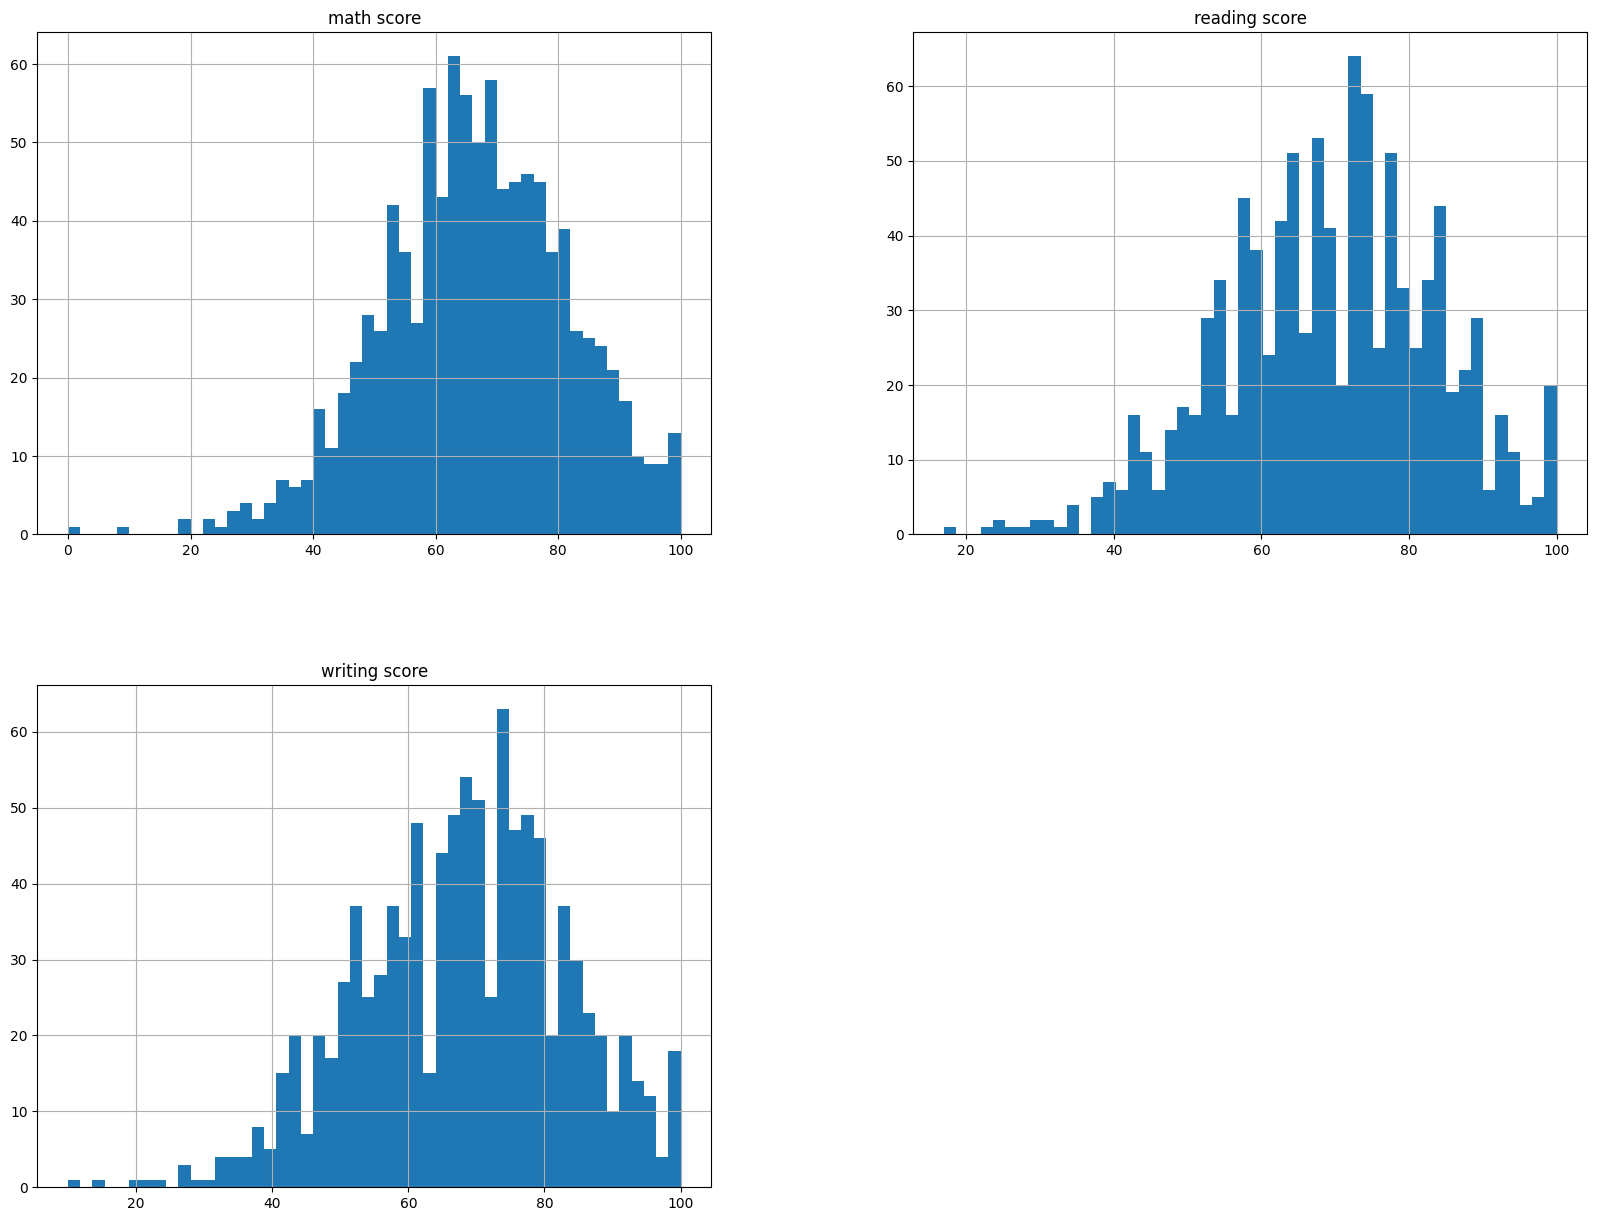

In [43]:
# Menampilkan korelasi history pada kolom numerik.
insu_df.hist(bins=50, figsize=(20,15))
plt.show()

**Visualisasi Histroy data numerik**

Pada tahap ini,melakukan untuk menampilkan visualisasi histroy pada setiap data numerik, agar penulis mengetahui bahwa ketiga mata pelajaran memiliki distribusi mendekati normal, dapat penulis lihat dari mata pelajaran matematika sedikit lebih rendah diantara 60-70, mata pelajaran reading cenderung lebih sedikit lebih tinggi diantara 65-75 dan mata pelajaran writing hampir sama dengan mata pelajaran matematika hanya 0.5% naik dibanding matematika.

**Kesimpulan**

Kesimpulan yang penulis ketahui bahwa `reading score` mendapatkan nilai yang paling tinggi dibanding dengan `math score` dan `writing score`.

 **Exploratory Data Analysis - Multivariate Analysis**

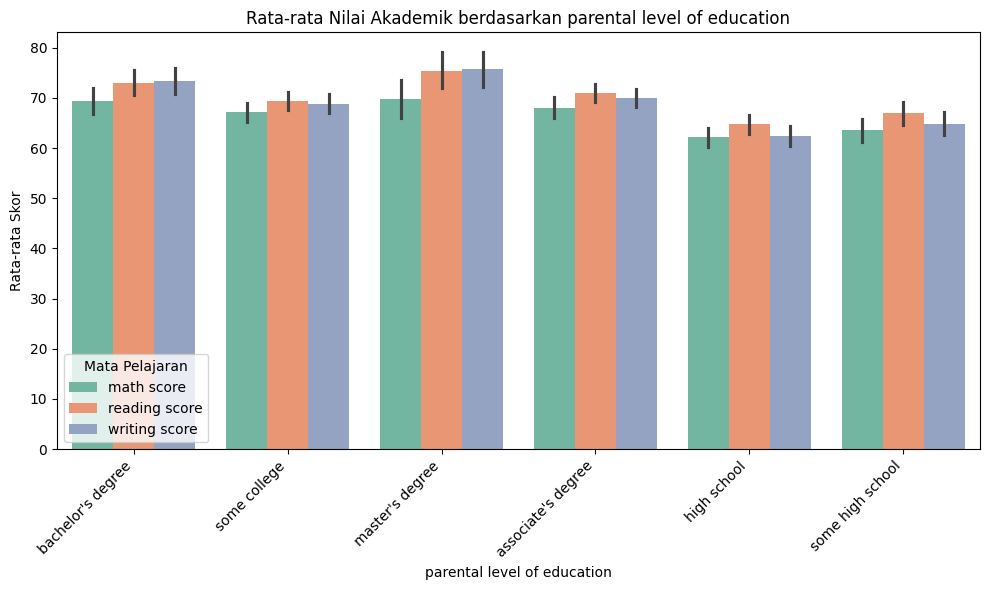

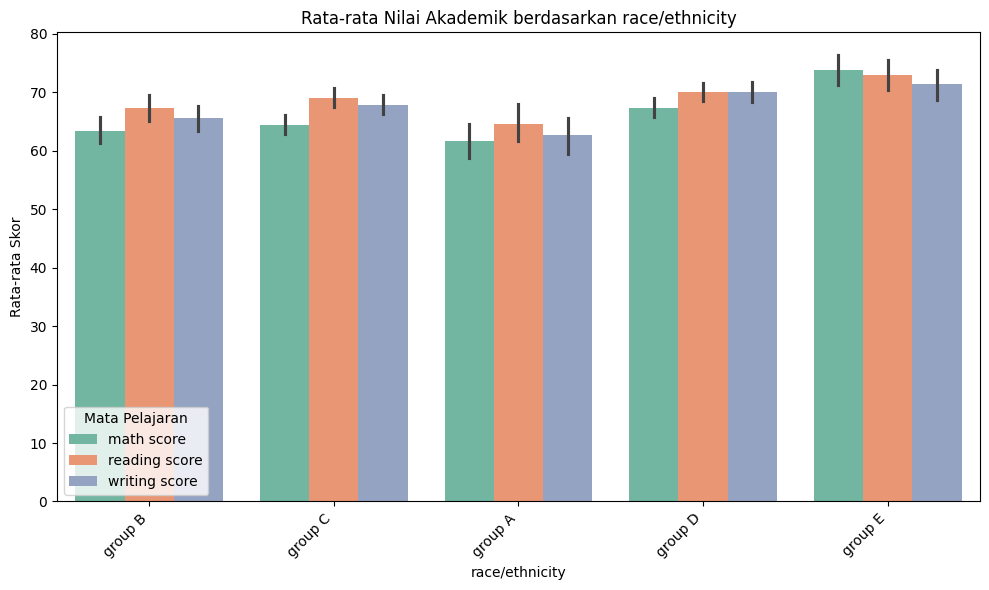

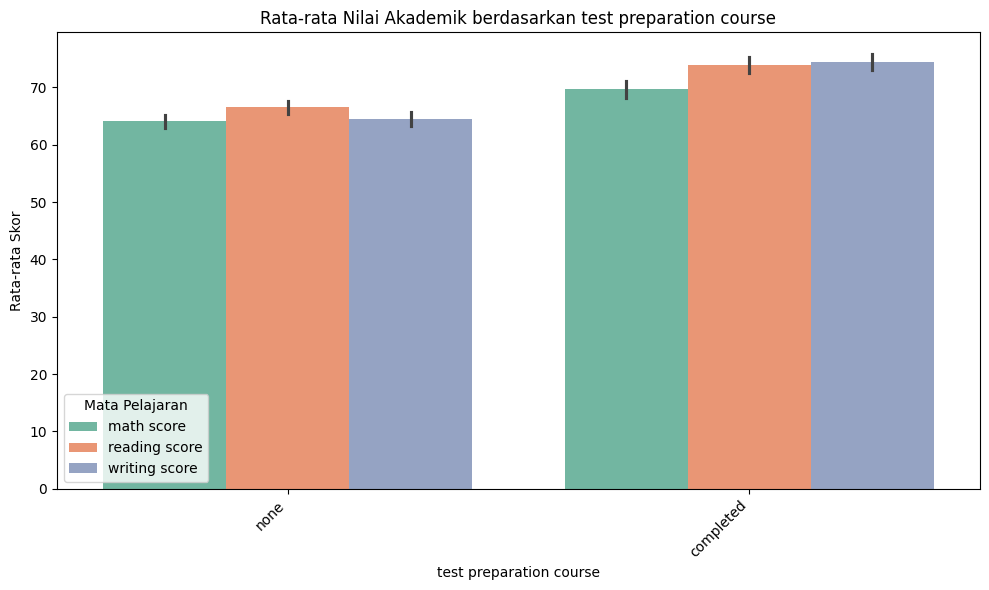

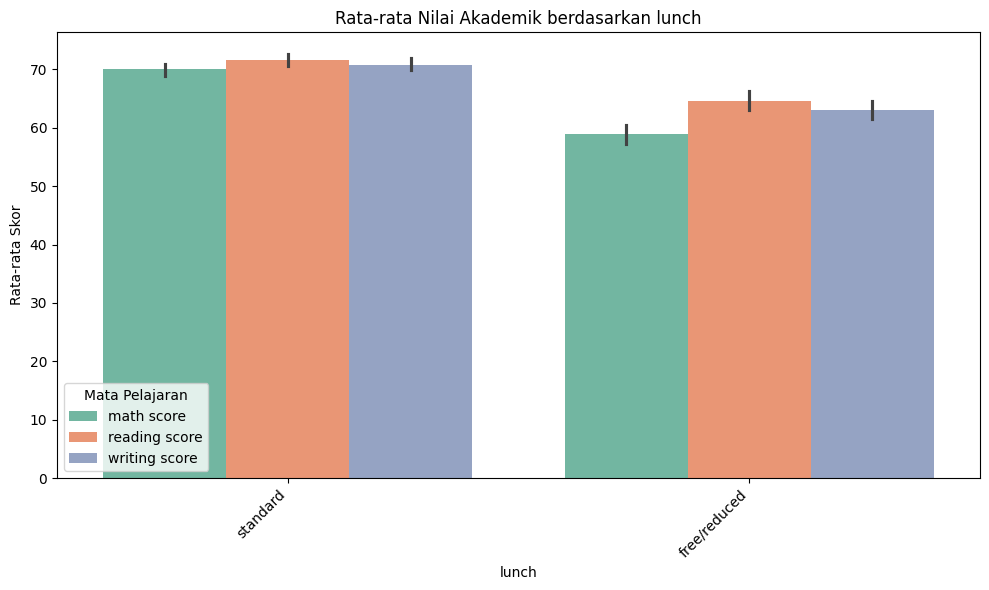

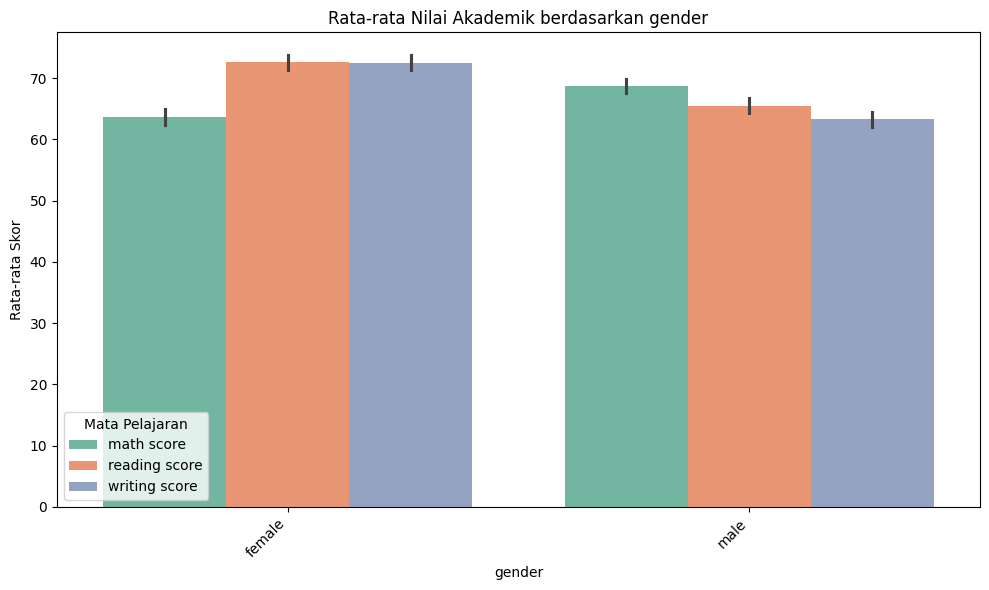

In [44]:
# melihat performa siswa pada setiap akademik menggunakan bar chart
long_df = insu_df.melt(
    id_vars=cat_features,
    value_vars=['math score', 'reading score', 'writing score'],
    var_name='Subject',
    value_name='Score'
)

# Buat barplot rata-rata nilai untuk setiap kategori dan mata pelajaran
for col in cat_features:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=long_df, x=col, y='Score', hue='Subject', palette='Set2')
    plt.title(f'Rata-rata Nilai Akademik berdasarkan {col}')
    plt.xlabel(col)
    plt.ylabel('Rata-rata Skor')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Mata Pelajaran')
    plt.tight_layout()
    plt.show()

**Visualisasi Korelasi numerik antar kategori**

Pada tahap ini, Penulis melakukan untuk melihat semua korelasi yang berpengaruh dalam performa siswa dalam nilai skor ujian pada setiap akademik yang siswa laksanakan. dari penulis lihat bahwa :    
- Pada bar chart parental level of education yang penulis lihat bahwa semakin **tinggi tingkat pendidikan orang tua maka skor nilai akademik tiap siswa lebih tinggi** dan **semakin rendah tingkat pendidikan orangtua maka skor nilai akademik tiap siswa lebih rendah.** maka jika penulis menganalisa dari gambar diatas bahwa rentang nilai antar tingkat pendidikan orang tua terlihat lebih lebar pada **mata pelajaran membaca dan menulis** dibandingkan dengan **matematika.** Ini mengindikasikan bahwa **tingkat pendidikan orang tua mungkin memiliki pengaruh yang lebih besar** pada kemampuan membaca dan menulis siswa.
- Pada bar chart race/ethinicity yang penulis lihat bahwa **Kelompok E cenderung memiliki rata-rata nilai tertinggi** secara keseluruhan dibandingkan kelompok lain, terutama dalam mata pelajaran membaca dan menulis dan **Kelompok A cenderung memiliki rata-rata nilai terendah** di antara kelompok lain dalam ketiga mata pelajaran.
- dari bar chart lunch yang penulis ketahui bahwa siswa yang mendapatkan **makan siang standar cenderung memiliki rata-rata nilai yang lebih tinggi** dalam ketiga mata pelajaran matematika, membaca, dan menulis dibandingkan dengan siswa yang mendapatkan **makan siang gratis.** walaupun begitu, perbedaan rata-rata nilai tampak paling besar pada **mata pelajaran membaca** dibanding dengan **mata pelajaran matematika dan menulis.**
- dari bar chart gender yang penulis ketahui bahwa terdapat perbedaan rata-rata nilai antara siswa perempuan dan laki-laki dalam mata pelajaran membaca dan menulis. **Siswa perempuan cenderung memiliki rata-rata skor yang lebih tinggi** dalam kedua mata pelajaran ini dibandingkan **siswa laki-laki** dan penulis ketahui bahwa siswa perempuan menunjukkan keunggulan yang lebih jelas dalam kemampuan verbal **membaca dan menulis,** sementara performa dalam **matematika** hampir setara dengan **siswa laki-laki.**

**Kesimpulan**

Kesimpulan dari visualisasi dari korelasi numerik antar kategori yang dapat penulis lihat bahwa tingkat pendidikan orang tua dapat berpengaruh signifikan dalam nilai siswa, jenis makan siang yang didapatkan oleh siswa lebih banyak mendapatkan nilai tinggi pada makan siang standar dibanding dengan makan siang gratis.

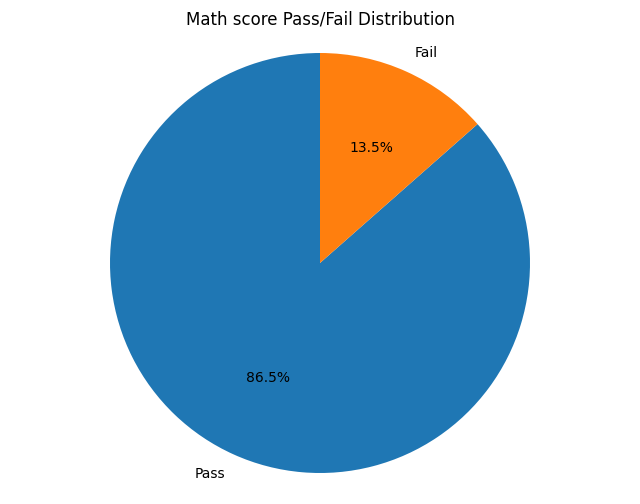

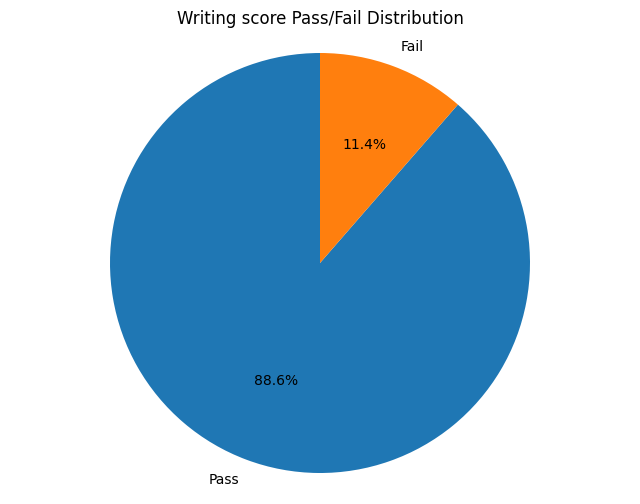

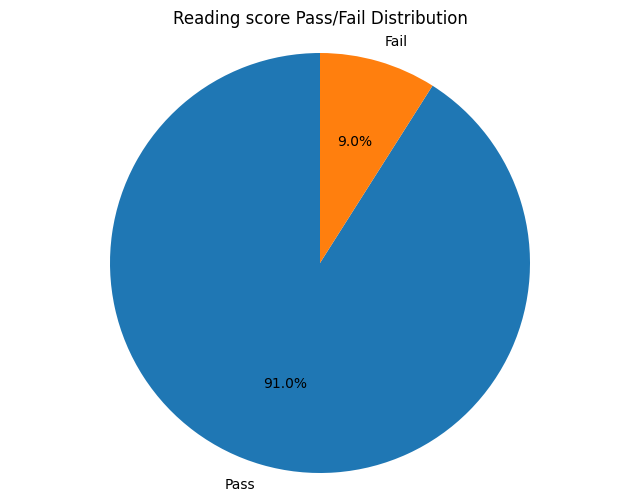

In [45]:
# Menampilkan nilai siswa yang lulus dan gagal pada setiap akademik.
# Plot pie charts for numerical features
for feature in num_features:
    pyplot.figure(figsize=(8, 6))
    labels = ['Pass', 'Fail']
    pass_fail = insu_df[feature].apply(lambda x: 'Pass' if x >= 50 else 'Fail')
    pass_counts = pass_fail.value_counts().reindex(labels, fill_value=0)

    pyplot.pie(pass_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    pyplot.title(f"{feature.capitalize()} Pass/Fail Distribution")
    pyplot.axis('equal')  # Agar pie chart berbentuk bulat
    pyplot.show()

**Visualisasi Korelasi Lulus dan Gagal pada akademik**

Pada tahap ini, penulis melakukan untuk menampilkan dan mengetahui kontrubusi nilai yang lulus dan gagal yang didapatkan oleh setiap siswa pada setiap akademik. yang penulis ketahui bahwa :    
- pada bar char math score yang dapat penulis ketahui adalah bahwa siswa yang dinyatakan lulus dalam ujian matematika lebih tinggi memiliki persentase 87,6% dibanding yang gagal memiliki persentase 12,4%.
- pada bar char writing score yang dapat penulis ketahui ialah bahwa siswa lebih banyak yang lulus pada ujian mata pelajaran menulis yang memiliki persentase 89,7% dibanding dengan siswa yang gagal memiliki persentase 10,3%.
- pada bar char reading score yang penulis ketahui adalah lebih banyak siswa yang lulus dalam ujian mata pelajaran membaca yang memiliki persentase 92,1% dibanding dengan siswa yang gagal memiliki persentase 7,9%.

**Kesimpulan**

Mata pelajaran dengan nilai akademik yang paling tinggi yaitu mata pelajaran reading score yang mencapai persentase 92,1% dan persentase kegagalan lebih rendah dari mata pelajaran lainnya.

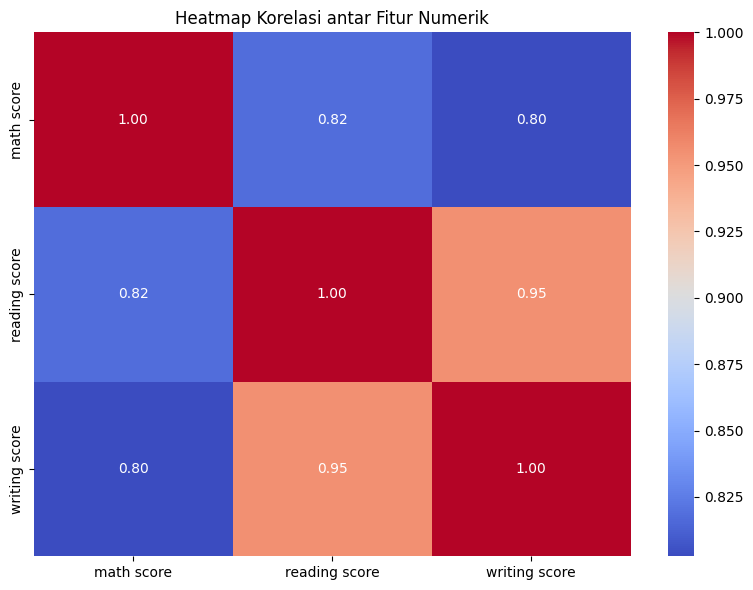

In [46]:
# Korelasi antar fitur numerik
plt.figure(figsize=(8, 6))
sns.heatmap(insu_df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi antar Fitur Numerik')
plt.tight_layout()
plt.show()

**Visualisasi Korelasi Heatmap**

Pada tahap ini,penulis perlu untuk mengetahui korelasi pada setiap data numerik dengan menggunakan plot `heatmap`. yang dapat penulis ketahui bahwa  fitur `math score` dan `writing score` keduanya memiliki hubungan yang positif dengan `reading score`. jadi, fitur `reading score` berkorelasi tinggi dengan kedua fitur tersebut.

## Data Preparation

Setelah melakukan tahap `Data Understanding` maka penulis melakukan tahap `Data Preparation` dari data yang telah penulis analisa sebelumnya. berikut penjelasannya :     
- Menangani outlier pada setiap data numerik.
- Membuat kolom baru yaitu `average score`
- One-Hot-Encoding pada data kategori
- Data Splitting
- Standarisasi pada data yang telah di spiltting.

In [47]:
# Menangani Outlier
numeric_df = insu_df.select_dtypes(include=['number'])
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
insu_df = insu_df[~((insu_df[numeric_df.columns] < (Q1 - 1.5 * IQR)) | (insu_df[numeric_df.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
# Cek ukuran dataset setelah drop outliers
insu_df.shape

(988, 8)

**Menangani Outlier**

Pada tahap ini, penulis melakukan untuk menangani outlier pada setiap data numerik yang telah penulis lakukan pada tahap `Data Understanding` untuk melihat perbedaan yang signifikan yang memiliki `outlier`. maka tahap ini, penulis melakukan rumus outlier yaitu `IQR = Q3-Q1` untuk membersihkan outlier pada data numerik. setelah menangani outlier, maka ukuran baris pada data telah berubah yaitu `988, 8` yang dapat kita lihat diatas.

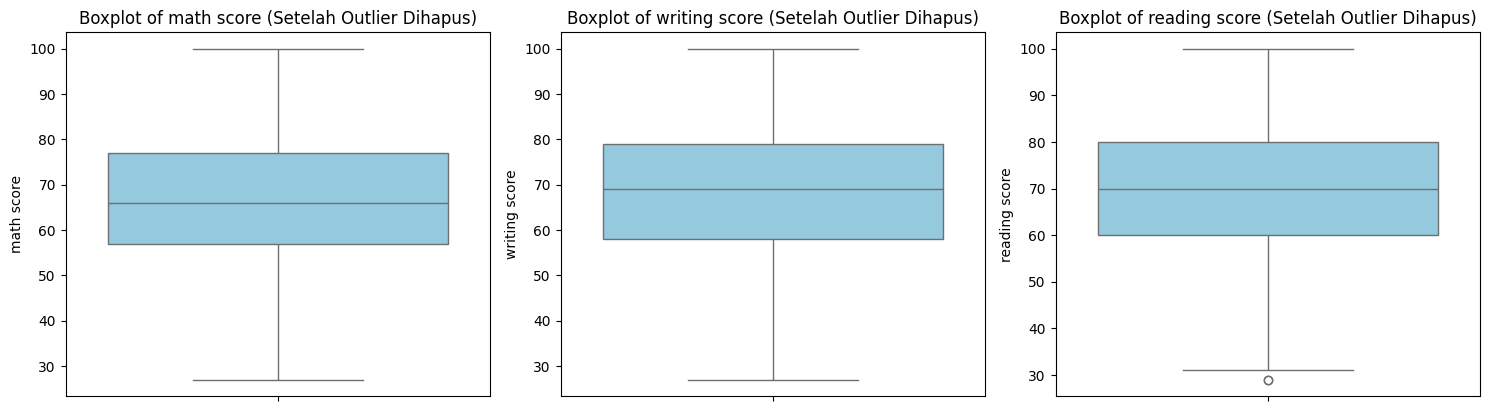

In [48]:
# Menampilkan hasil setelah Outlier.
# Pilih kolom numerik
numerical_cols = ['math score', 'writing score', 'reading score']

# Buat boxplot untuk masing-masing kolom numerik
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=insu_df[col], color='skyblue')
    plt.title(f"Boxplot of {col} (Setelah Outlier Dihapus)")
    plt.tight_layout()

plt.show()

**Visualisasi setelah Outlier**

Setelah menangani outlier pada data numerik, maka penulis perlu menampilkan hasil setelah menangani outlier. terlihat dari hasil diatas yang penulis ketahui bahwa tidak ada perbedaan yang signifikan antar semua data numerik yang dapat kita lihat diatas.

In [49]:
# membuat kolom baru yaitu 'Average Score'
df = insu_df.copy()
avg = df[['math score','reading score','writing score']].mean(axis=1)
df['avarage score']= avg
df['avarage score']

,avarage score
0,72.666667
1,82.333333
2,92.666667
3,49.333333
4,76.333333
...,...
995,94.000000
996,57.333333
997,65.000000
998,74.333333


**Membuat kolom baru yaitu `average score`**

Pada tahap ini, setelah penulis ketahui pada tahap `Data Understanding` sebelumnya bahwa ada perbedaan yang signifikan dari fitur numerik yang penulis ananlisis, maka daripada adanya ketimpangan nilai yang akan di latih setelahnya. penulis membuat kolom fitur baru `average score` yang berfungsi sebagai target yang akan penulis latih dan mendapatkan `insight` dari nilai rata-rata siswa pada setiap akademik yang siswa laksanakan.

In [50]:
# melakukan One-Hot-Encoding pada setiap kolom kategori.
# One-Hot Encoding per kolom, gabung ke DataFrame
df = pd.concat([df, pd.get_dummies(df['gender'], prefix='gender')], axis=1)
df = pd.concat([df, pd.get_dummies(df['lunch'], prefix='lunch')], axis=1)
df = pd.concat([df, pd.get_dummies(df['parental level of education'], prefix='parental level of education')], axis=1)
df = pd.concat([df, pd.get_dummies(df['test preparation course'], prefix='test preparation course')], axis=1)
df = pd.concat([df, pd.get_dummies(df['race/ethnicity'], prefix='race/ethnicity')], axis=1)
# Drop kolom aslinya
df.drop(['test preparation course','race/ethnicity','parental level of education','gender','lunch'], axis=1, inplace=True)

df.head()


,math score,reading score,writing score,avarage score,gender_female,gender_male,lunch_free/reduced,lunch_standard,parental level of education_associate's degree,parental level of education_bachelor's degree,...,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,test preparation course_completed,test preparation course_none,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E
0,72,72,74,72.666667,True,False,False,True,False,True,...,False,False,False,False,True,False,True,False,False,False
1,69,90,88,82.333333,True,False,False,True,False,False,...,False,True,False,True,False,False,False,True,False,False
2,90,95,93,92.666667,True,False,False,True,False,False,...,True,False,False,False,True,False,True,False,False,False
3,47,57,44,49.333333,False,True,True,False,True,False,...,False,False,False,False,True,True,False,False,False,False
4,76,78,75,76.333333,False,True,False,True,False,False,...,False,True,False,False,True,False,False,True,False,False


**One-Hot-Encoding pada data kategori**

Pada tahap ini, penulis melakukan fungsi `.get_dummies` yang berfungsi untuk mengubah tipe data kategori menjadi `True` dan `False`.

In [51]:
# Melakukan pembagian data untuk menentukan fitur dan target.
# Fitur dan Target
X = df.drop(['avarage score'],axis =1)
y = df["avarage score"]

**Data Splitting**

Pada tahap ini, penulis melakukan pembagian data menjadi 2 bagian yaitu yaitu `X` yang berfungsi untuk menghapus kolom average score dan `y` untuk menampilkan kolom average score

In [52]:
# Split Data
# melakukan pembagian data X dan y dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f'Total jumlah sample pada dataset: {len(X)}')
print(f'Total jumlah sample pada train dataset: {len(X_train)}')
print(f'Total jumlah sample pada test dataset: {len(X_test)}')

Total jumlah sample pada dataset: 988
Total jumlah sample pada train dataset: 790
Total jumlah sample pada test dataset: 198


Pada tahap ini, penulis melakukan pembagian data menjadi `data train` dan `data testing` untuk penulis lakukan pada latih model setelahnya.setelah melakukan pembagian data menjadi `X_train` dan `y_test`. maka penulis bisa mengetahui berapa banyak jumlah sampel pada setiap data yang telah penulis bagikan sebelumnya.

In [53]:
# Menentukan fitur numerik yang akan distandarisasi
numerical_features = ['math score', 'writing score']

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fitting scaler hanya pada training data
scaler.fit(X_train[numerical_features])

# Transformasi data training dan testing
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

**Standarisasi pada data `X_train` dan `X_test`**

Setelah melakukan tahap pembagian data split, maka penulis perlu untuk melakukan standarisasi pada `X_train` dan `X_test` dengan menggunakan fungsi `.transform` dari teknik  StandarScaler pada library ScikitLearn.

## Modeling

**Model Development**

In [54]:
# Siapkan dataframe untuk analisis model
df_models = pd.DataFrame(index=['Train MSE', 'Test MSE'],
                      columns=['KNN', 'RandomForest', 'Boosting','SVM'])

Pada tahap ini, penulis membuat semua model yang akan dilatih pada satu dataframe. yang dimana penulis menggunakan model `KNN, RF, SVM dan Boosting`.

**K-Nearest Neighborn**

In [55]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
df_models.loc['Train MSE','KNN'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [56]:
# Prediksi di training set
y_train_pred = knn.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Prediksi di test set
y_test_pred = knn.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 4.6074
Test MSE: 6.3813


**Model 1 : K-Nearest Neighbors**

Pada tahap ini, penulis melakukan untuk melatih data train dan mendapatkan hasil prediksi pada model yang penulis uji.
- Tahap pertama melakukan library KNN, setelah itu melatih model dengan memasukkan lokasi model yang akan dilatih dan mendapatkan hasil nilai prediksi. disini penulis menggunakan `MSE` untuk tahap prediksi nilai eror.
- setelah itu, penulis melakukan prediksi pada training set dan test set serta menampilkan hasil nilai train MSE dan data test MSE pada model KNN.

**Random Forest**

In [57]:
# buat model prediksi
rf = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf.fit(X_train, y_train)

df_models.loc['Train MSE','RandomForest'] = mean_squared_error(y_pred=rf.predict(X_train), y_true=y_train)

In [58]:
# Prediksi di training set
y_train_pred = rf.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Prediksi di test set
y_test_pred = rf.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 0.0816
Test MSE: 0.5691


**Model 2 : Random Forest**

Pada tahap ini, penulis melakukan tahap melatih model menggunakan model `Random Forest` yang dapat diketahui bahwa :    
- Tahap pertama, penulis melakukan library RF untuk dapat melatih model. setelah itu, melakukan pembagian data yang dapat dilihat diatas.
- setelah itu, penulis melakukan pembagian data menjadi `training set` dan `tes set` untuk mendapatkan nilai train MSE dan data test MSE pada model RF.

**Boosting**

In [59]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
df_models.loc['Train MSE','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [60]:
# Prediksi di training set
y_train_pred = boosting.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Prediksi di test set
y_test_pred = boosting.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 6.2529
Test MSE: 8.0989


**Model 3 : Boosting**

Pada tahap ini, penulis melakukan tahap melatih model menggunakan model `Boosting` yang dapat diketahui bahwa :    
- Tahap pertama yang dilakukan penulis ialah membuat fungsi boosting dari library sckitlearn untuk dapat melatih model. setelah itu, melakukan pembagian data untuk mendapatkan hasil nilai pada data train dan data test.
- setelah itu, penulis membagi menjadi 2 yaitu `training set` dan `test set ` untuk melihat hasil nilai MSE pada setiap data yang penulis uji.

**SVM**

In [61]:
svm= SVR()
svm.fit(X_train, y_train)
df_models.loc['Train MSE','SVM'] = mean_squared_error(y_pred=svm.predict(X_train), y_true=y_train)

In [62]:
# Prediksi di training set
y_train_pred = svm.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)

# Prediksi di test set
y_test_pred = svm.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")

Train MSE: 11.7547
Test MSE: 14.2621


**Model 4: Support Vector Mechine**

Pada tahap ini, penulis melakukan untuk melatih model SVM untuk mendapatkan hasil nilai MSE terbaik. berikut penjelasannya :    
- tahap awal yang dilakukan penulis ialah melakukan fungsi SVR untuk model SVM.setelah itu, menggunakan fungsi `.fit()` pada data `X_train` dan ``y_train`` dan melakukan pembagian pada data yang akan dilatih setelahnya.
- setelah itu, melakukan pembagian data menjadi `training set` dan `test set` untuk mendapatkan hasil evaluasi dari nilai eror MSE pada setiap data.

## Evaluasi Model

In [63]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['Train', 'Test'], index=['KNN','RF','Boosting','SVM'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': rf, 'Boosting': boosting,'SVM':svm}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'Train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'Test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
 # Panggil mse
mse

,Train,Test
KNN,4.607423,6.381308
RF,0.081564,0.569088
Boosting,6.252855,8.098882
SVM,11.754703,14.262057


In [64]:
mse

,Train,Test
KNN,4.607423,6.381308
RF,0.081564,0.569088
Boosting,6.252855,8.098882
SVM,11.754703,14.262057


**Hasil nilai MSE**

setelah melakukan pelatihan serta evaluasi pada setiap model, maka penulis menampilkan hasil kontrobusi dari setiap nilai error MSE pada setiap model. pada hasil diatas yang dapat disimpulkan bahwa nilai error yang lebih rendah ialah **Random Forest** yang memiliki jumlah error pada `train 0.081` dan `test 0.56` dibanding dengan model KNN memiliki nilai eror yang tinggi yaitu pada `train 4.60` dan `test 6.38`, Boosting memiliki nilai error yang stabil yaitu `train 6.25` dan `test 8.09` tetapi ini bukan model terbaik dan SVM memiliki nilai error yang lebih tinggi yaitu `train 11.75` dan `test 14.26`

**Kesimpulan**

Pada pengujian dan evaluasi model yang telah penulis lakukan, maka model terbaik untuk melakukan prediksi pada nilai siswa dalam akademik yaitu model **Random Forest**.

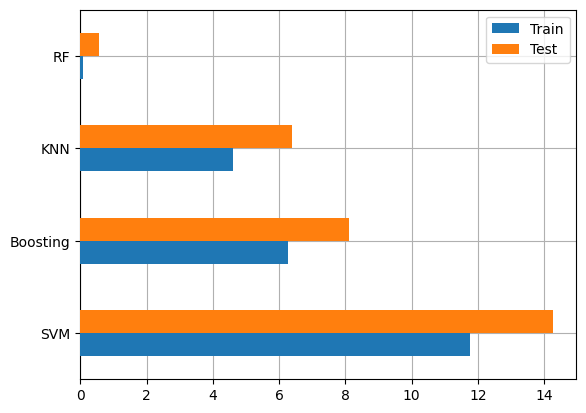

In [65]:
fig, ax = plt.subplots()
mse.sort_values(by='Test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)


**Visualisasi hasil evaluasi MSE**

Dalam hal ini, kita tentu model terbaik dalam melakukan prediksi pada nilai ujian siswa pada setiap akademik yaitu model **Random forest**. dibanding dengan model KNN yang memiliki nilai tinggi, Boosting yang memiliki nilai stabil tetapi belum memenuhi model terbaik dikarenakan pada data test masih tergolong memiliki nilai error yang tinggi dan model SVM memiliki error yang sangat tinggi.

In [66]:
# Menampilkan hasil prediksi dari model-model yang dilatih
pred_1 = knn.predict(X_test)
pred_2 = rf.predict(X_test)
pred_3 = boosting.predict(X_test)
pred_4 = svm.predict(X_test)


df_prediksi = pd.DataFrame({
    'y_true': y_test,
    'prediksi_KNN': pred_1,
    'prediksi_RF': pred_2,
    'prediksi_Boosting': pred_3,
    'prediksi_svm': pred_4
})


df_prediksi.index.name = 'index_sample'


print(df_prediksi.sample(1).sort_index())


                 y_true  prediksi_KNN  prediksi_RF  prediksi_Boosting  \
index_sample                                                            
862           39.666667          43.1    39.973333          41.119658   

              prediksi_svm  
index_sample                
862              45.765602  


**Hasil Nilai Prediksi**

Dari model yang telah penulis latih dan evaluasi, maka penulis mendapatkan nilai error MSE yang lebih kecil pada model yang dilatih. dapat kita lihat bahwa pada hasil diatas menampilkan hasil prediksi dari `index_sample` yang penulis buat. pada `index_sample` 811 diketahui bahwa nilai prediksi model KNN memiliki nila 47,73, model RF memiliki nilai prediksi 47.40, model Boostong memiliki nilai prediksi 49,46 dan model SVM memiliki nilai prediksi 48.90

### Kesimpulan

Dapat dilihat dari empat model algoritma yang diuji, yaitu KNN, Random Forest, Boosting, dan SVM, bahwa dari hasil perbandingan prediksi serta visualisasi error pada data train dan test, masing-masing model menunjukkan performa yang bervariasi.

Berdasarkan grafik perbandingan nilai error (MSE) pada data test, model Boosting **memiliki prediksi yang paling jauh dari nilai aktual, menandakan bahwa model ini cenderung overestimasi.** Kemudian, model KNN **memiliki hasil prediksi yang juga dekat dengan nilai aktual,** dibanding Boosting. Sementara itu, model **Random Forest memiliki nilai error lebih sedikit pada data train dan test.**

Sedangkan **model SVM menunjukkan nilai error yang paling tinggi di antara keempat model,** baik pada data train maupun test, yang mengindikasikan bahwa SVM cenderung underfitting pada data ini.